## Add extension to find exectution time

In [1]:
# ! pip3 install ipython-autotime
%load_ext autotime

## Imports

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

time: 2.2 ms


## variable declarations

In [3]:
data_points = np.array([[1., 1.1],
                  [1., 1.],
                  [0., 0.],
                  [0., 0.1]])
labels = ['A', 'A', 'B', 'B']
new_point = np.array([0., 0.])

time: 1.51 ms


## Find distance from the new point to all the data points

In [4]:
# tile is used to duplicate the numpy array in any direction specified
rows, cols = data_points.shape
nd_new_point = np.tile(new_point, (rows, 1)) # Lets duplicate only rows
nd_new_point

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

time: 693 ms


In [5]:
diff_array = data_points - nd_new_point # subtract
sq_diff_array = diff_array ** 2 # take squares
diff_array, sq_diff_array

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 array([[1.  , 1.21],
        [1.  , 1.  ],
        [0.  , 0.  ],
        [0.  , 0.01]]))

time: 101 ms


In [6]:
dist = sq_diff_array.sum(axis=1)
dist_sorted_indices = dist.argsort() # gives indices in which you have to sort to get a sorted array
dist, dist_sorted_indices

(array([2.21, 2.  , 0.  , 0.01]), array([2, 3, 1, 0]))

time: 79 ms


In [7]:
class_count = list()
k = 1

for i in range(k):
    votelabel = labels[dist_sorted_indices[i]]
    class_count.append(votelabel)
    
counter = Counter(class_count)
nearest = counter.most_common()[0][0]
nearest

'B'

time: 96.6 ms


## Putting it all together 

In [8]:
def knn(new_point, data_points, labels, k=3):
    rows, cols = data_points.shape
    nd_new_point = np.tile(new_point, (rows, 1))
    diff_array = data_points - nd_new_point # subtract
    sq_diff_array = diff_array ** 2 # take squares
    dist = sq_diff_array.sum(axis=1)
    dist_sorted_indices = dist.argsort()
    class_count = list()
    for i in range(k):
        votelabel = labels[dist_sorted_indices[i]]
        class_count.append(votelabel)

    counter = Counter(class_count)
    nearest = counter.most_common()[0][0]
    return nearest

time: 102 ms


## Testing by running from sklearn

In [9]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(data_points, labels)
neigh.predict([new_point])

KNeighborsClassifier(n_neighbors=1)

array(['B'], dtype='<U1')

time: 198 ms


## Testing on dating dataset

In [10]:
path_dating = "data/dating_dataset.txt"
labels = list()
with open(path_dating, "r") as f:
    dating = f.read()
rows = dating.split("\n")
features = np.zeros((len(rows), 3))
for index, row in enumerate(rows):
    columns = row.split("\t")
    if len(columns) < 4: continue
    features[index, :] = columns[:3]
    labels.append(columns[-1])
features = features[:1000]

time: 87.8 ms


Features here are:
1. Number of frequent flyer miles earned per year
2. Percentage of time spent playing video games
3. Liters of ice cream consumed per week

In [11]:
df_labels = pd.DataFrame(labels, columns=["labels"])
df_labels.head()
df_labels["labels"].unique()

,labels
0,largeDoses
1,smallDoses
2,didntLike
3,didntLike
4,didntLike


array(['largeDoses', 'smallDoses', 'didntLike'], dtype=object)

time: 102 ms


There are three classes in which we are trying to do the prediction

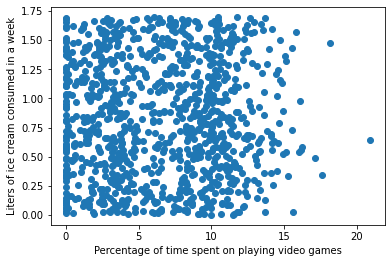

time: 292 ms


In [12]:
_ = plt.scatter(features[:,1], features[:,2])
_ = plt.xlabel("Percentage of time spent on playing video games")
_ = plt.ylabel("Liters of ice cream consumed in a week")
plt.show()

In [13]:
pd.DataFrame(features, columns=["frequent_flyer_miles", "percentage_time_spent_on_games", "liters_of_ice_cream_consumed_per_week"]).head()

,frequent_flyer_miles,percentage_time_spent_on_games,liters_of_ice_cream_consumed_per_week
0,40920.0,8.326976,0.953952
1,14488.0,7.153469,1.673904
2,26052.0,1.441871,0.805124
3,75136.0,13.147394,0.428964
4,38344.0,1.669788,0.134296


time: 11.5 ms


As we can see, all three features are in different number ranges. We have to normalize and bring everything on similar scales

In [14]:
features_min = features.min(0)
features_max = features.max(0)
ranges = features_max - features_min
rows, cols = features.shape
norm_features = np.zeros((rows, cols))
norm_features = features - np.tile(features_min, (rows, 1))
norm_features /= np.tile(ranges, (rows, 1))
norm_features

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

time: 70.6 ms


In [15]:
ranges
features_min

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

array([0.      , 0.      , 0.001156])

time: 80 ms


## Define function for normalizing

In [16]:
def normalize(features):
    features_min = features.min(0)
    features_max = features.max(0)
    ranges = features_max - features_min
    rows, cols = features.shape
    norm_features = np.zeros((rows, cols))
    norm_features = features - np.tile(features_min, (rows, 1))
    norm_features /= np.tile(ranges, (rows, 1))
    return norm_features

time: 88.7 ms


In [17]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1)

time: 336 ms


In [21]:
features_train, features_test = normalize(features_train), normalize(features_test)
error_count = 0

for feature, label in zip(features_test, labels_test):
    predicted_label = knn(feature, features_train, labels_train, k=1)
    if label != predicted_label: error_count += 1
    
print(f"Total Error rate {error_count  * 100/ len(features_test)} %")

Total Error rate 9.0 %
time: 15.2 ms


In [23]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(features_train, labels_train)
neigh.score(features_test, labels_test)

KNeighborsClassifier(n_neighbors=1)

0.91

time: 20.7 ms


We are getting same accuracy by our classifier too!